In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Regression/Advertising.csv")

In [3]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
data.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
data.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

/home/hemanth/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales', ylabel='count'>

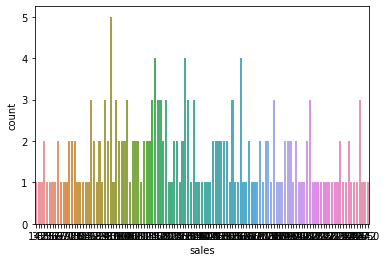

In [8]:
sns.countplot(data['sales'])


<AxesSubplot:>

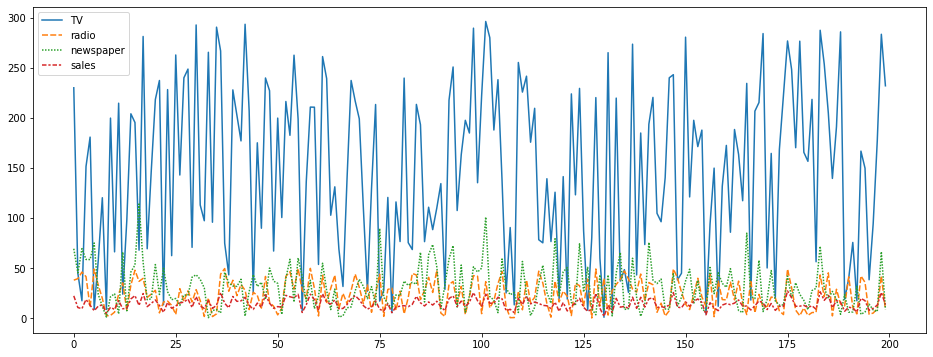

In [9]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))
sns.lineplot(data=data)



<AxesSubplot:>

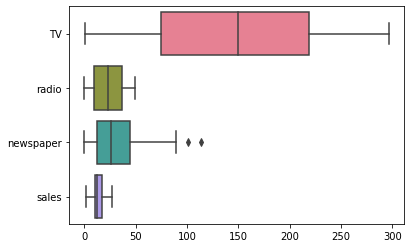

In [10]:
sns.boxplot(data=data, orient='horizontal', palette='husl')



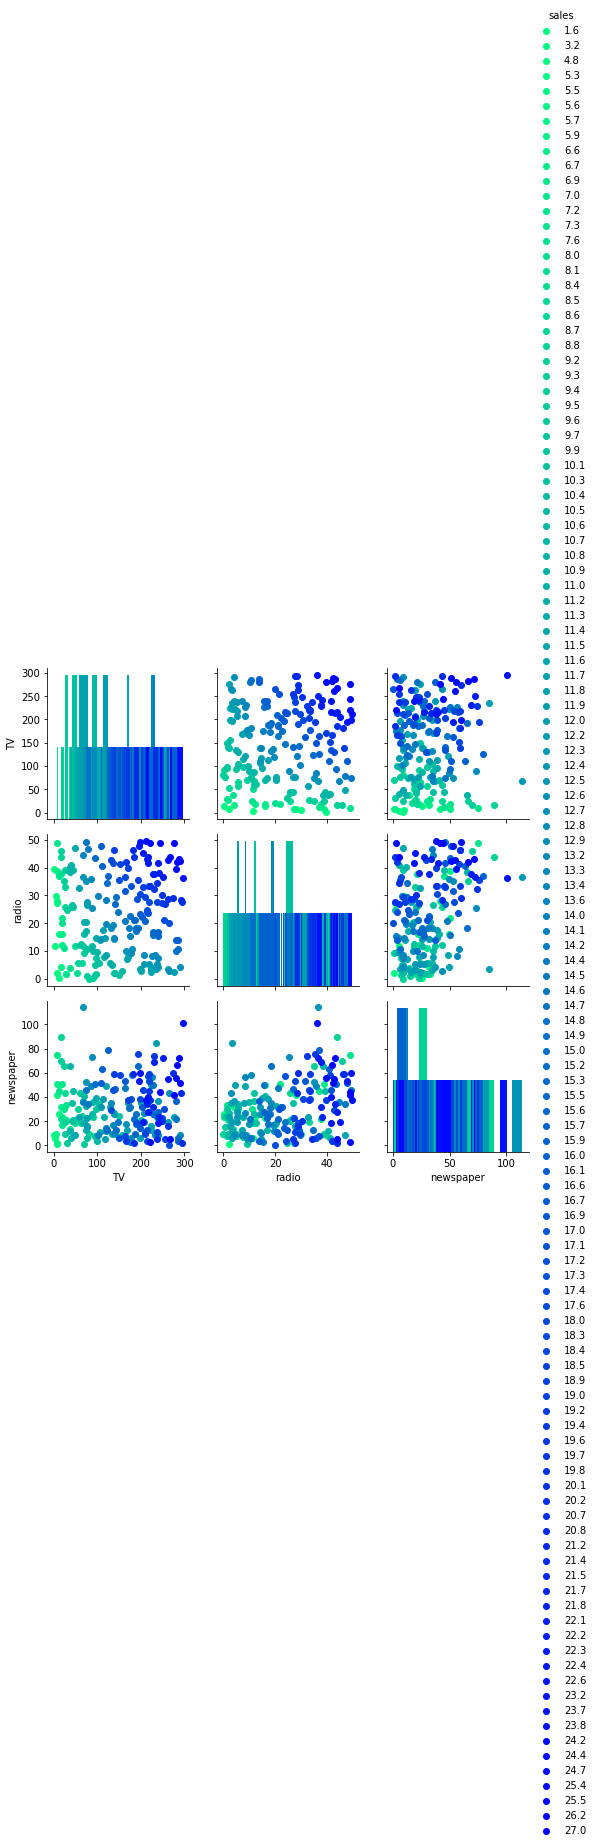

In [11]:
x = sns.PairGrid(data, hue='sales', palette='winter_r') # coolwarm, husl, winter_r, RdBu.
x = x.map_diag(plt.hist)
x = x.map_offdiag(plt.scatter)
x.add_legend()

/home/hemanth/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/hemanth/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/hemanth/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/hemanth/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/hemanth/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/hemanth/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance;

/home/hemanth/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/hemanth/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/hemanth/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/hemanth/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/hemanth/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/hemanth/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance;

/home/hemanth/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/hemanth/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/hemanth/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/hemanth/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/hemanth/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/hemanth/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance;

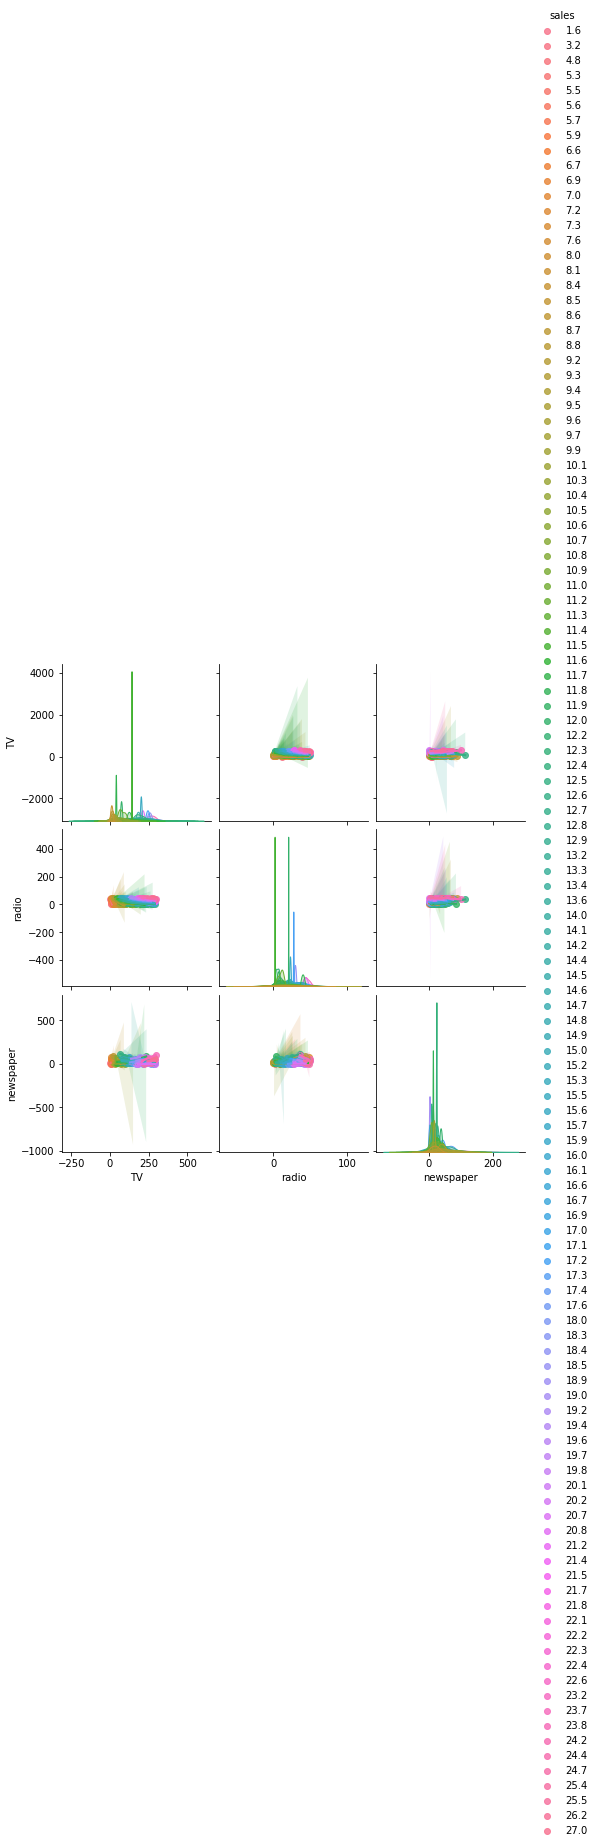

In [12]:
sns.pairplot(data, diag_kind='kde', palette='husl', hue='sales',
            kind='reg')




In [13]:
train_dataset=data.sample(frac=0.8,random_state=0)
test_dataset=data.drop(train_dataset.index)

In [14]:
print(train_dataset.shape)
print(test_dataset.shape)

(160, 4)
(40, 4)


In [15]:
train_dataset.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

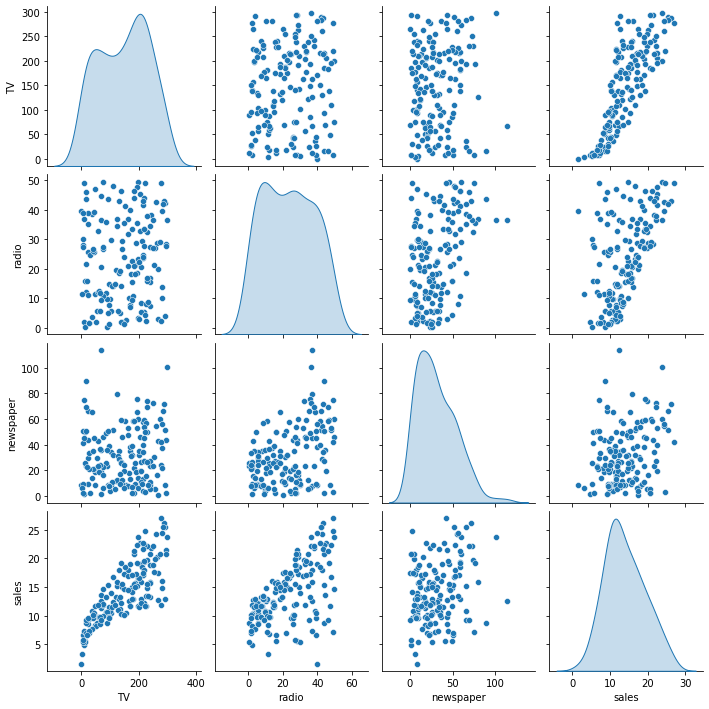

In [16]:
sns.pairplot(train_dataset[['TV', 'radio', 'newspaper', 'sales']],diag_kind='kde')

In [17]:
train_stats=train_dataset.describe()
train_stats.pop('sales')
train_stats=train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
TV,160.0,146.878750,86.316062,0.7,68.850,154.05,217.025,296.4
radio,160.0,23.334375,14.528246,0.3,10.625,23.45,35.925,49.4
newspaper,160.0,31.211875,22.439631,0.3,12.200,26.30,46.050,114.0


In [18]:
train_labels=train_dataset.pop('sales')
test_labels=test_dataset.pop('sales')

In [19]:
print(train_labels.shape)
print(test_labels.shape)

(160,)
(40,)


In [20]:
def norm(x):
    return (x-train_stats['mean'])/train_stats['std']
normed_train_data=norm(train_dataset)
normed_test_data=norm(test_dataset)

In [21]:
len(train_dataset.keys())

3

In [22]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow import keras
import tensorflow as tf

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [26]:
def build_model():
    model=keras.Sequential([
        layers.Dense(32,activation='relu',input_shape=[len(train_dataset.keys())]),## input layer
        layers.Dense(32,activation='relu'),## hidden layer
        layers.Dense(1)#output
        
      ])
    optimizer=tf.keras.optimizers.RMSprop(0.001)
    
    model.compile(loss='mse',
                 optimizer=optimizer,metrics=['mae','mse'])
    return model

In [27]:
model=build_model()
model

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                128       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,217
Trainable params: 1,217
Non-trainable params: 0
_________________________________________________________________


In [29]:
example_batch=normed_train_data[:10]
example_result=model.predict(example_batch)
example_result

array([[-0.10149205],
       [-0.14035994],
       [-0.21142402],
       [-0.4208772 ],
       [-0.3460412 ],
       [-0.33542165],
       [-0.95702064],
       [ 0.06968912],
       [-0.6949512 ],
       [ 0.07771762]], dtype=float32)

In [30]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:225.0459,  mae:14.0796,  mse:225.0459,  val_loss:239.4956,  val_mae:14.3337,  val_mse:239.4956,  
....................................................................................................
Epoch: 100, loss:3.7550,  mae:1.4975,  mse:3.7550,  val_loss:5.4811,  val_mae:1.8330,  val_mse:5.4811,  
....................................................................................................
Epoch: 200, loss:0.7105,  mae:0.5792,  mse:0.7105,  val_loss:1.1256,  val_mae:0.7418,  val_mse:1.1256,  
....................................................................................................
Epoch: 300, loss:0.2903,  mae:0.3702,  mse:0.2903,  val_loss:0.6265,  val_mae:0.5122,  val_mse:0.6265,  
....................................................................................................
Epoch: 400, loss:0.2007,  mae:0.3074,  mse:0.2007,  val_loss:0.5158,  val_mae:0.4647,  val_mse:0.5158,  
..............................................................

In [31]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,225.045929,14.079554,225.045929,239.495605,14.333662,239.495605,0
1,218.604675,13.851022,218.604675,234.092697,14.143015,234.092697,1
2,213.722122,13.673294,213.722122,229.456345,13.978756,229.456345,2
3,209.358612,13.514380,209.358612,224.948944,13.819189,224.948944,3
4,205.108734,13.359188,205.108734,220.384430,13.657682,220.384430,4


In [32]:
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.078054,0.224927,0.078054,0.298596,0.394445,0.298596,995
996,0.063808,0.196298,0.063808,0.285745,0.383187,0.285745,996
997,0.073472,0.208103,0.073472,0.304597,0.391689,0.304597,997
998,0.071353,0.206700,0.071353,0.366105,0.451912,0.366105,998
999,0.064939,0.198392,0.064939,0.299896,0.391657,0.299896,999


In [33]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter

Text(0, 0.5, 'MAE [sales]')

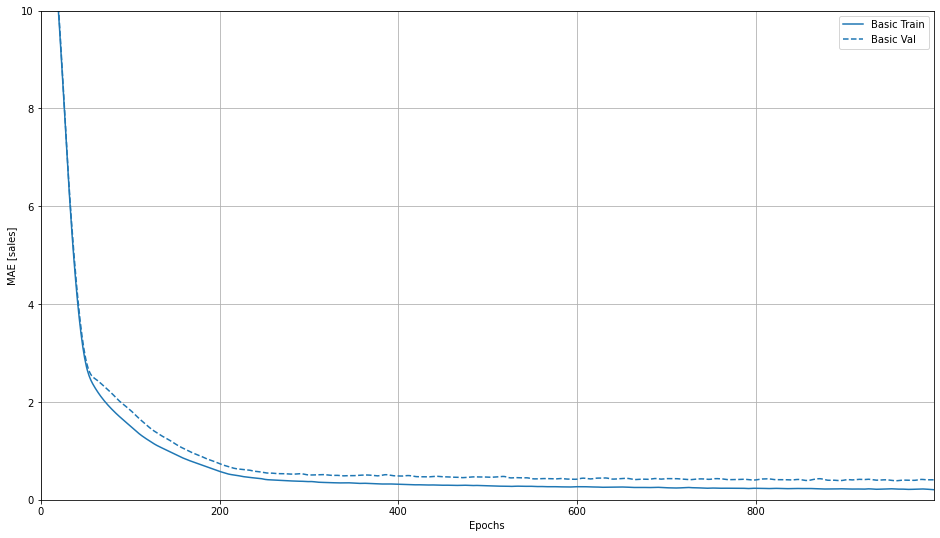

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [sales]')

Text(0, 0.5, 'MSE [sales^2]')

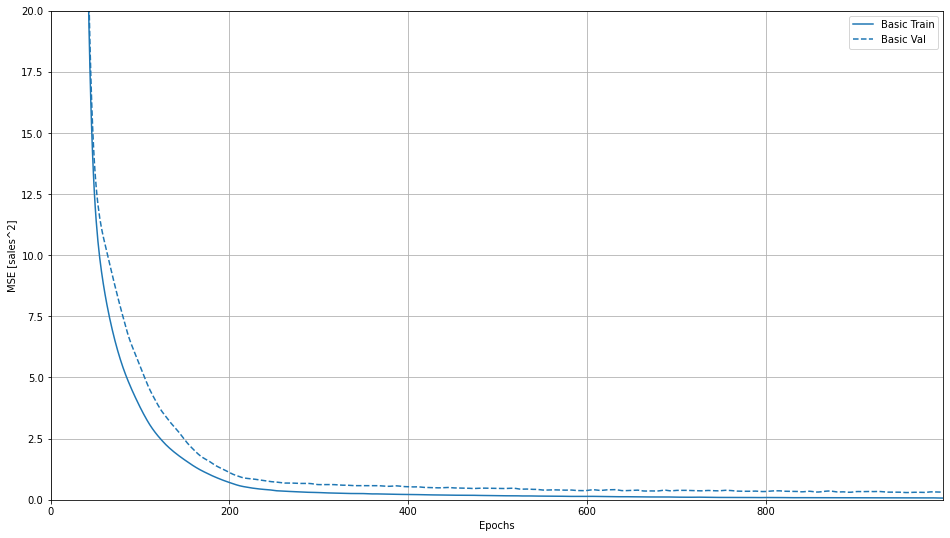

In [35]:
plt.figure(figsize=(16,9))
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [sales^2]')

In [36]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:213.1249,  mae:13.6930,  mse:213.1249,  val_loss:229.4276,  val_mae:14.0490,  val_mse:229.4276,  
...........................................................

Text(0, 0.5, 'MAE [sales]')

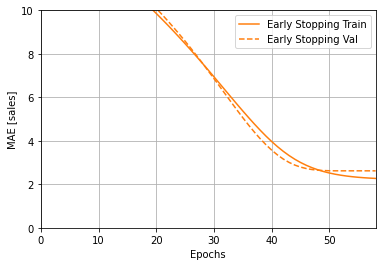

In [37]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [sales]')

In [38]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:10.2f} sales".format(mae))

2/2 - 0s - loss: 8.9910 - mae: 2.4920 - mse: 8.9910
Testing set Mean Abs Error:       2.49 sales


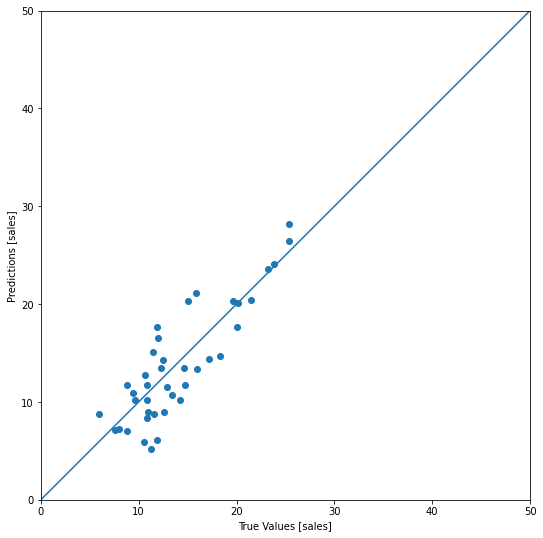

In [39]:
### Model Prediction
test_predictions = model.predict(normed_test_data).flatten()
plt.figure(figsize=(16,9))
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [sales]')
plt.ylabel('Predictions [sales]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

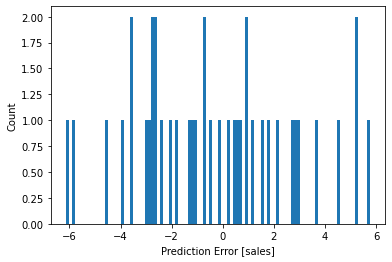

In [41]:
error = test_predictions - test_labels
plt.hist(error, bins = 100)
plt.xlabel("Prediction Error [sales]")
_ = plt.ylabel("Count")